In [9]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Read the cleaned CSV file
file_path = 'gdb9_G4MP2_withdata_hydrogenation_clean.csv'
data = pd.read_csv(file_path)


Mean Absolute Error on Test Set: 39.48406034455206


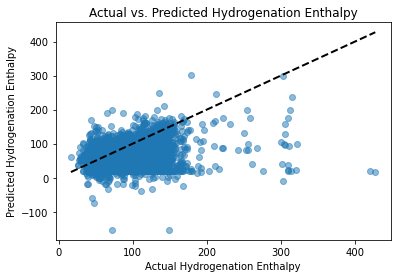

In [10]:
# Linear Regression

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


# Combine the unsaturated and saturated SMILES strings
SMILES = clean_data['unsat_SMILE'] + clean_data['sat_SMILE']

# Vectorize the SMILES strings using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(SMILES)

# Target variable is the hydrogenation enthalpy
y = clean_data['delta_H']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')


# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Hydrogenation Enthalpy')
plt.ylabel('Predicted Hydrogenation Enthalpy')
plt.title('Actual vs. Predicted Hydrogenation Enthalpy')
plt.show()



Mean Absolute Error on Test Set: 29.0499837056941


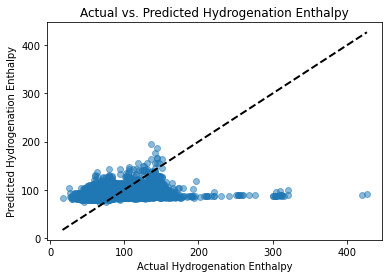

In [11]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.linear_model import LinearRegression

# Function to compute 10 molecular descriptors
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return [
        Descriptors.MolWt(mol),
        Descriptors.NumValenceElectrons(mol),
        Descriptors.NumHeteroatoms(mol),
        Descriptors.NumRotatableBonds(mol),
        Descriptors.NumHDonors(mol),
        Descriptors.NumHAcceptors(mol),
        Descriptors.MolLogP(mol),
        Descriptors.TPSA(mol),
        Descriptors.NHOHCount(mol),
        Descriptors.NOCount(mol),
        Descriptors.RingCount(mol)
    ]

# Apply the compute_descriptors function to the SMILES columns
X_unsat = clean_data['unsat_SMILE'].apply(compute_descriptors)
X_sat = clean_data['sat_SMILE'].apply(compute_descriptors)

# Combine the descriptors for both unsaturated and saturated SMILES
X = pd.DataFrame(list(zip(X_unsat, X_sat))).applymap(lambda x: x[0] + x[1])

y = clean_data['delta_H']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Hydrogenation Enthalpy')
plt.ylabel('Predicted Hydrogenation Enthalpy')
plt.title('Actual vs. Predicted Hydrogenation Enthalpy')
plt.show()
